In [102]:
import pandas as pd
import numpy as np

# Prepare Data

In [103]:
df = pd.read_csv('salary-job-data.csv')

In [104]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [105]:
# lower case the columns and replace whitespace with underscores.
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [106]:
df.dtypes

age                    float64
gender                  object
education_level         object
job_title               object
years_of_experience    float64
salary                 float64
dtype: object

In [107]:
df = df.dropna()

# check the shape to confirm how many rows remain
print(df.shape)

# (optional) confirm there are no missing values
print(df.isnull().sum())

(373, 6)
age                    0
gender                 0
education_level        0
job_title              0
years_of_experience    0
salary                 0
dtype: int64


In [108]:
# isolate the columns containing strings
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['gender', 'education_level', 'job_title']

In [109]:
# now all strings should be lower and camel cased
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,male,bachelor's,software_engineer,5.0,90000.0
1,28.0,female,master's,data_analyst,3.0,65000.0
2,45.0,male,phd,senior_manager,15.0,150000.0
3,36.0,female,bachelor's,sales_associate,7.0,60000.0
4,52.0,male,master's,director,20.0,200000.0


# EDA

In [110]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[32. 28. 45. 36. 52.]
31

gender
['male' 'female']
2

education_level
["bachelor's" "master's" 'phd']
3

job_title
['software_engineer' 'data_analyst' 'senior_manager' 'sales_associate'
 'director']
174

years_of_experience
[ 5.  3. 15.  7. 20.]
28

salary
[ 90000.  65000. 150000.  60000. 200000.]
36



In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='salary', ylabel='Count'>

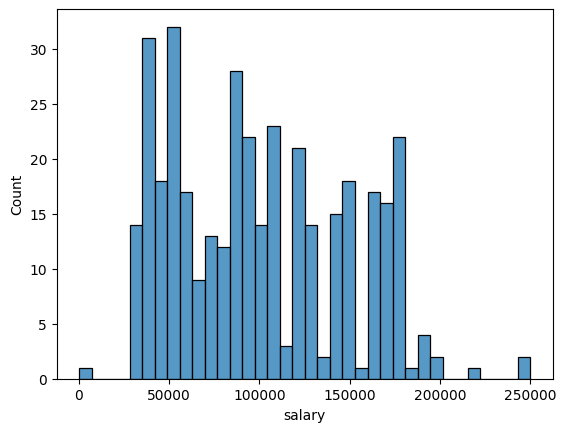

In [112]:
# plot the count of salaries in the data set
sns.histplot(df.salary, bins=36)

In [113]:
df.head()

,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,male,bachelor's,software_engineer,5.0,90000.0
1,28.0,female,master's,data_analyst,3.0,65000.0
2,45.0,male,phd,senior_manager,15.0,150000.0
3,36.0,female,bachelor's,sales_associate,7.0,60000.0
4,52.0,male,master's,director,20.0,200000.0


In [116]:
# mean salary for females
salary_female = df[df.gender == 'female'].salary.mean()
salary_female = round(salary_female, 2)

In [115]:
# mean salary for males
salary_male = df[df.gender == 'male'].salary.mean()
salary_male = round(salary_male, 2)

In [117]:
f'The mean salary of females: ${salary_female}', f'the mean salary of males: ${salary_male}'

('The mean salary of females: $97011.17',
 'the mean salary of males: $103867.78')

In [118]:
print(df.groupby('gender')['salary'].describe())

        count           mean           std      min      25%      50%  \
gender                                                                  
female  179.0   97011.173184  45916.141054  35000.0  50000.0  90000.0   
male    194.0  103867.783505  50182.461438    350.0  60000.0  97500.0   

             75%       max  
gender                      
female  140000.0  190000.0  
male    140000.0  250000.0  


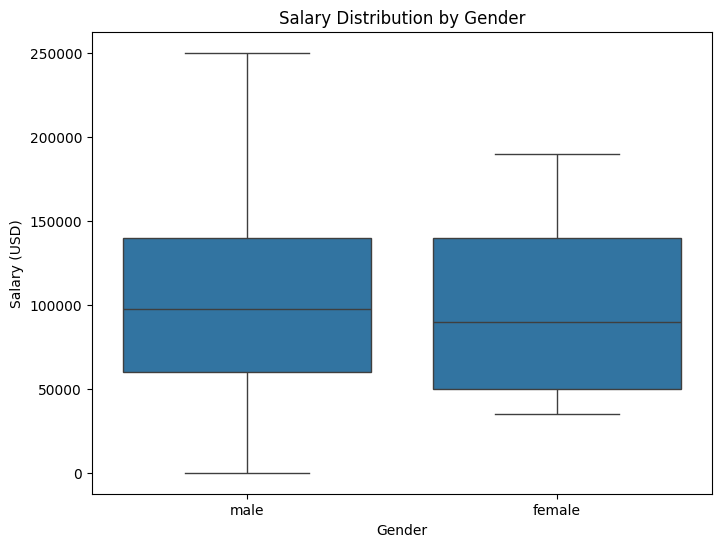

In [119]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='salary', data=df)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary (USD)')
plt.show()

# Feature Importance

In [120]:
from sklearn.metrics import mutual_info_score

In [121]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df.salary)

In [122]:
categorical = ['gender', 'education_level', 'job_title']

In [126]:
# job title is more important than education and gender
mi = df[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

job_title          2.565475
education_level    0.454428
gender             0.084725
dtype: float64

In [127]:
top_titles = df['job_title'].value_counts().head(10).index
df_top = df[df['job_title'].isin(top_titles)]

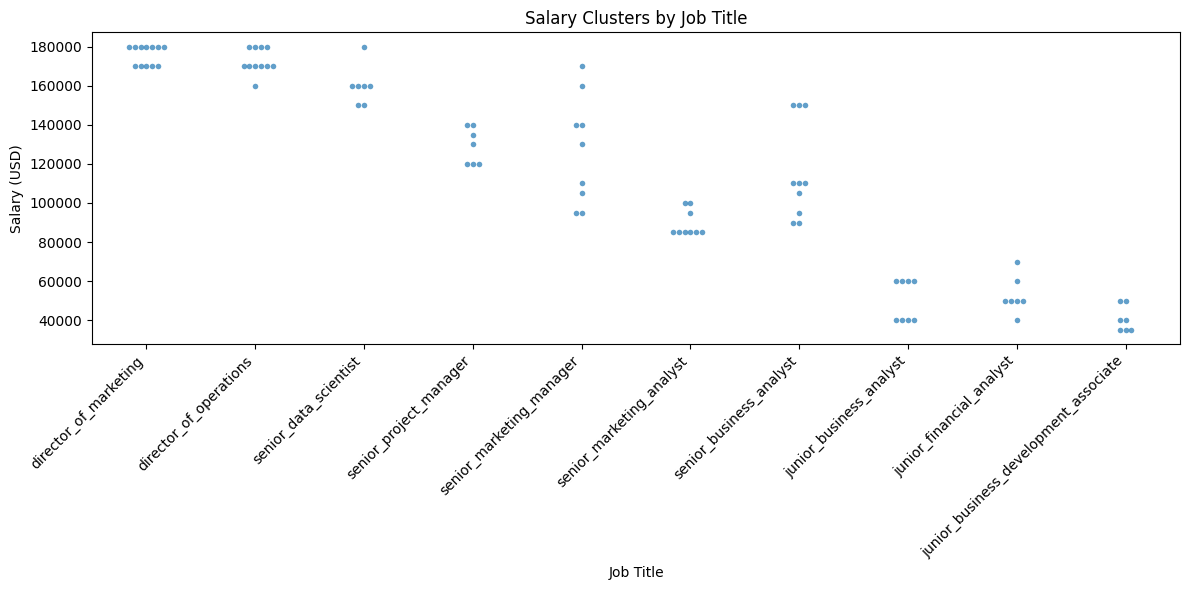

In [128]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='job_title', y='salary', data=df_top, size=4, alpha=0.7)
plt.title('Salary Clusters by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Regression

In [129]:
# where do we have null values and how many are there?
df.isnull().sum()

age                    0
gender                 0
education_level        0
job_title              0
years_of_experience    0
salary                 0
dtype: int64

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [132]:
len(df_full_train), len(df_test)

(298, 75)

In [133]:
df_train, df_val =  train_test_split(df_full_train, test_size=0.25, random_state=1)

In [134]:
len(df_train), len(df_test), len(df_val)

(223, 75, 75)

In [135]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [136]:
y_train = df_train.salary.values
y_val = df_val.salary.values
y_test = df_test.salary.values

In [137]:
del df_train['salary']
del df_val['salary']
del df_test['salary']

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer

In [139]:
# Convert dataframe to list of dictionaries
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

In [140]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [141]:
X_train.shape, X_val.shape

((223, 135), (75, 135))

In [142]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [143]:
y_pred = model.predict(X_val)

In [144]:
from sklearn.metrics import mean_squared_error

In [145]:
# calculate the root mean square error
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('Validation RMSE:', rmse)

Validation RMSE: 19612.38062489793


In [146]:
# standard deviation of salaries
np.std(y_val)

np.float64(45827.017746691265)

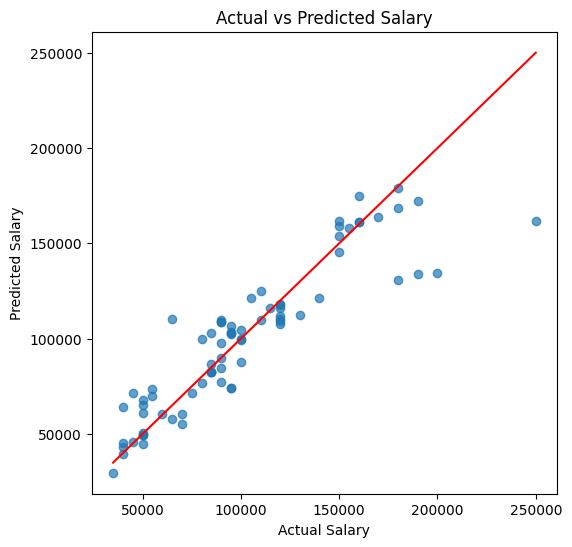

In [147]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred, alpha=0.7)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red')
plt.show()

In [ ]:
# Not great, let's see if a decision tree it better

In [148]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# try a simple tree first (no tuning)
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)

# predict on validation
y_pred_dt = dt.predict(X_val)

# evaluate RMSE
rmse_dt = np.sqrt(mean_squared_error(y_val, y_pred_dt))
print('Decision Tree RMSE:', rmse_dt)

Decision Tree RMSE: 17869.900204906946


In [149]:
y_pred_lr = model.predict(X_val)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))

print('Linear Regression RMSE:', rmse_lr)
print('Decision Tree RMSE:', rmse_dt)

Linear Regression RMSE: 19612.38062489793
Decision Tree RMSE: 17869.900204906946


In [156]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20]:
    dt = DecisionTreeRegressor(max_depth=d, random_state=1)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f'max_depth={d:>4}  RMSE={rmse:.2f}')


max_depth=   1  RMSE=30645.36
max_depth=   2  RMSE=21438.05
max_depth=   3  RMSE=20820.29
max_depth=   4  RMSE=17171.20
max_depth=   5  RMSE=16974.38
max_depth=   6  RMSE=16131.49
max_depth=  10  RMSE=16457.07
max_depth=  15  RMSE=17476.17
max_depth=  20  RMSE=17869.90


In [157]:
# max_depth = 6 where RMSE=16131.49 is the best let's plot it

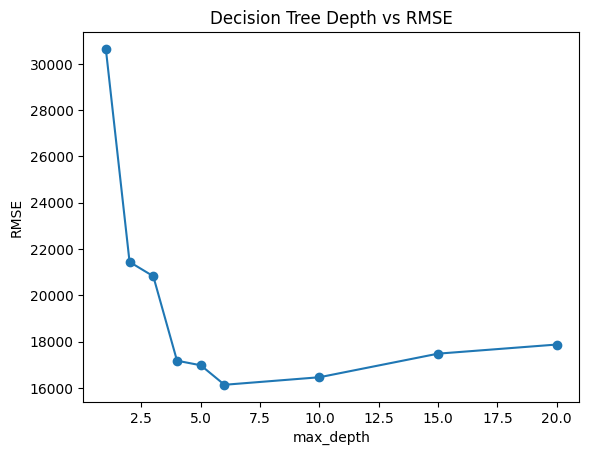

In [158]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20]
rmses = []

for d in depths:
    dt = DecisionTreeRegressor(max_depth=d, random_state=1)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmses.append(rmse)

plt.plot(depths, rmses, marker='o')
plt.title('Decision Tree Depth vs RMSE')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

In [160]:
# let's tune min_sample_leaf
for leaf_size in [1, 2, 5, 10, 20, 50]:
    dt = DecisionTreeRegressor(
        max_depth=6,
        min_samples_leaf=leaf_size,
        random_state=1
    )
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f'min_samples_leaf={leaf_size:>3}  RMSE={rmse:.2f}')

min_samples_leaf=  1  RMSE=16131.49
min_samples_leaf=  2  RMSE=15188.46
min_samples_leaf=  5  RMSE=16156.08
min_samples_leaf= 10  RMSE=17494.20
min_samples_leaf= 20  RMSE=19385.81
min_samples_leaf= 50  RMSE=25019.90


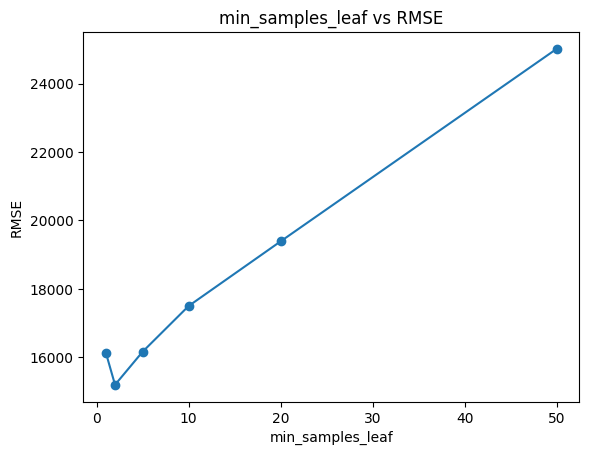

In [162]:
# let's plot these to visualize
leaf_sizes = [1, 2, 5, 10, 20, 50]
rmses = []

for leaf_size in leaf_sizes:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=leaf_size, random_state=1)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmses.append(rmse)

plt.plot(leaf_sizes, rmses, marker='o')
plt.title('min_samples_leaf vs RMSE')
plt.xlabel('min_samples_leaf')
plt.ylabel('RMSE')
plt.show()

In [163]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, random_state=1)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_val = dt.predict(X_val)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

print(f"Train RMSE: {rmse_train:.2f}")
print(f"Validation RMSE: {rmse_val:.2f}")

Train RMSE: 10733.73
Validation RMSE: 15188.46


In [164]:
features = dv.get_feature_names_out()
importances = dt.feature_importances_

df_importance = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(df_importance.head(10))

                                          feature  importance
134                           years_of_experience    0.927880
5                                     gender=male    0.015078
3                             education_level=phd    0.009999
1                      education_level=bachelor's    0.009817
0                                             age    0.008496
7              job_title=administrative_assistant    0.007832
2                        education_level=master's    0.006164
73                            job_title=recruiter    0.005205
113              job_title=senior_project_manager    0.004318
41   job_title=junior_business_operations_analyst    0.001982


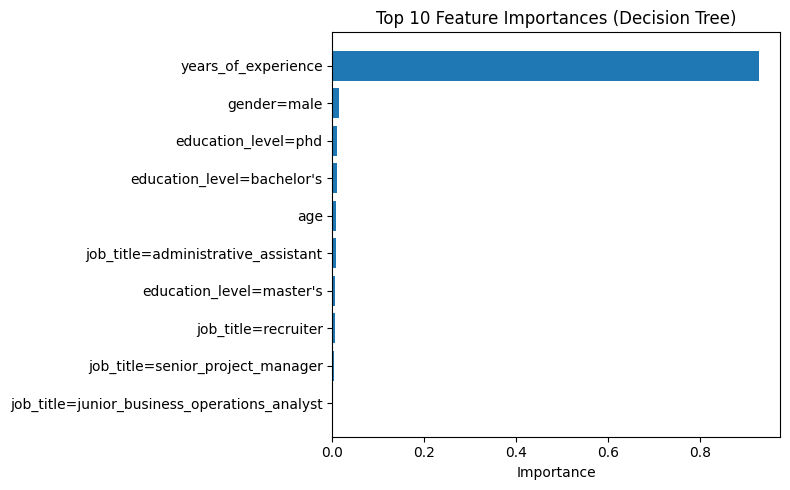

In [165]:
plt.figure(figsize=(8, 5))
plt.barh(df_importance['feature'][:10], df_importance['importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [166]:
X_test = dv.transform(df_test.to_dict(orient='records'))
y_pred_test = dt.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Test RMSE:', rmse_test)

Test RMSE: 14595.268256534553


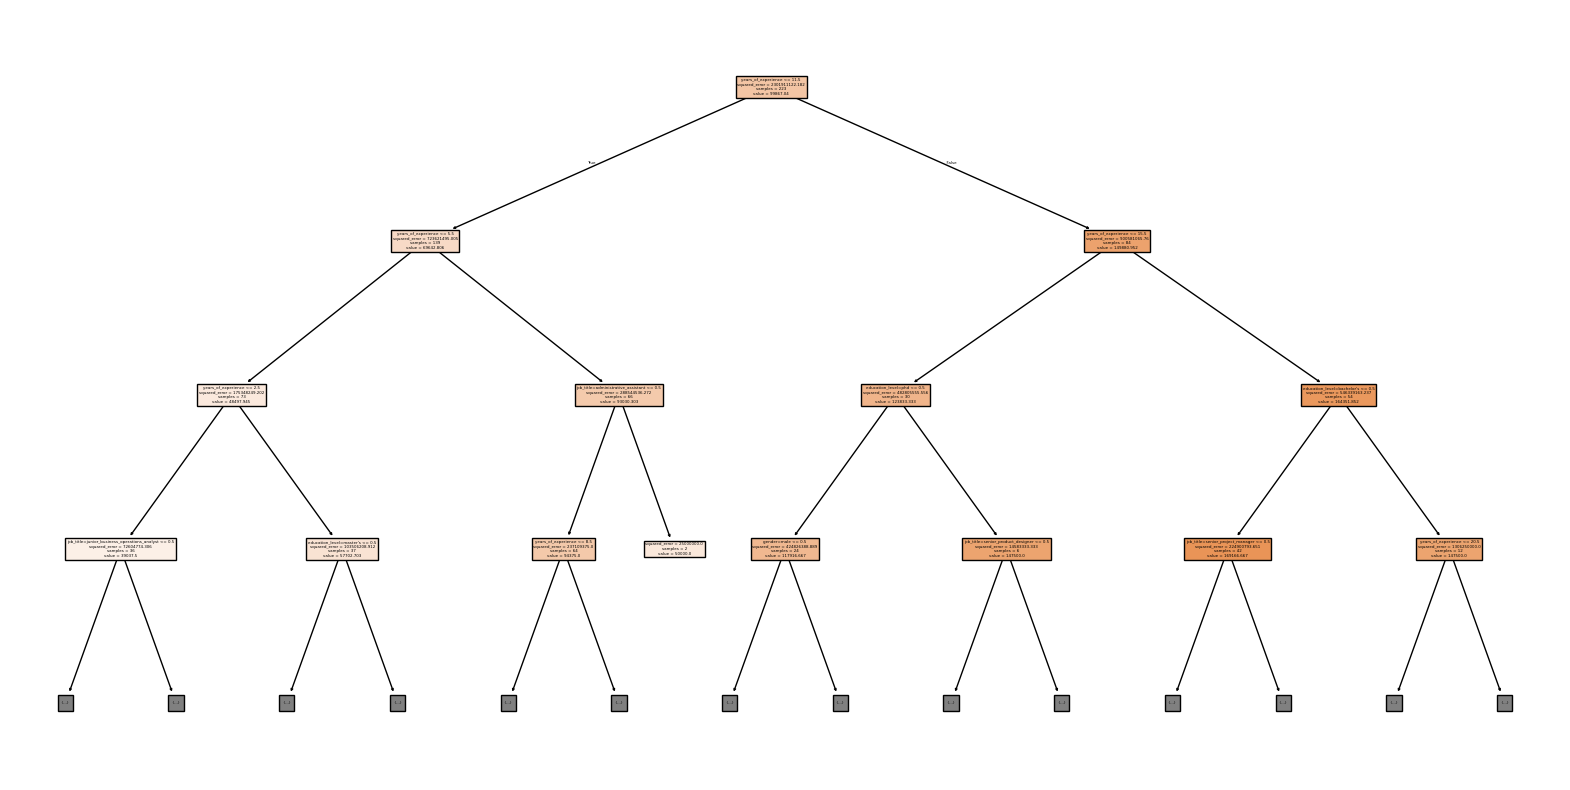

In [167]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=dv.get_feature_names_out(), filled=True, max_depth=3)
plt.show()